assignment 6 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras



In [ ]:
# Load the Boston housing dataset from Keras
boston = keras.datasets.boston_housing
(X_train, y_train), (X_test, y_test) = boston.load_data(test_split=0.2, seed=42)

# Normalize the features
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std



In [ ]:
# Define a function to train and evaluate the models with varying training sizes
def evaluate_models(train_sizes):
    mae_scores_dnn = []
    mse_scores_dnn = []
    medae_scores_dnn = []
    mae_scores_lr = []
    mse_scores_lr = []
    medae_scores_lr = []

    for size in train_sizes:
        # Select a subset of the training data
        idx = np.random.choice(X_train.shape[0], int(X_train.shape[0] * size), replace=False)
        X_train_subset, y_train_subset = X_train[idx], y_train[idx]

        # Deep neural network model
        model = keras.Sequential([
            keras.layers.Dense(64, activation='relu', input_shape=(X_train_subset.shape[1],)),
            keras.layers.Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train_subset, y_train_subset, epochs=100, verbose=0)
        y_pred_dnn = model.predict(X_test)

        # Linear regression model
        lr_model = np.linalg.lstsq(X_train_subset, y_train_subset, rcond=None)[0]
        y_pred_lr = np.dot(X_test, lr_model)

        # Compute evaluation metrics
        mae_scores_dnn.append(np.mean(np.abs(y_test - y_pred_dnn)))
        mse_scores_dnn.append(np.mean(np.square(y_test - y_pred_dnn)))
        medae_scores_dnn.append(np.median(np.abs(y_test - y_pred_dnn)))
        mae_scores_lr.append(np.mean(np.abs(y_test - y_pred_lr)))
        mse_scores_lr.append(np.mean(np.square(y_test - y_pred_lr)))
        medae_scores_lr.append(np.median(np.abs(y_test - y_pred_lr)))

    return mae_scores_dnn, mse_scores_dnn, medae_scores_dnn, mae_scores_lr, mse_scores_lr, medae_scores_lr



In [ ]:
# Specify the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Evaluate models and get evaluation scores
mae_scores_dnn, mse_scores_dnn, medae_scores_dnn, mae_scores_lr, mse_scores_lr, medae_scores_lr = evaluate_models(train_sizes)



4/4 [==============================] - 0s 7ms/step


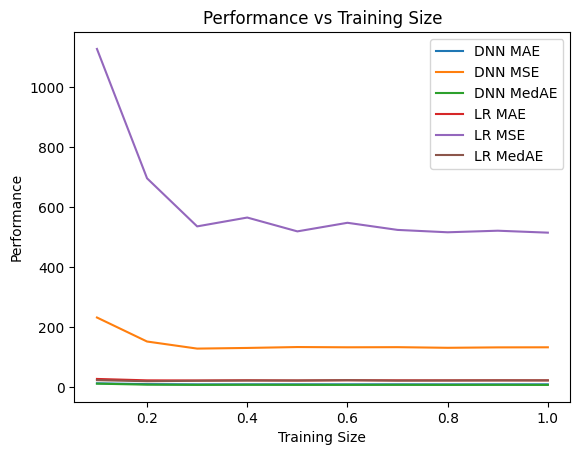

In [ ]:
plt.plot(train_sizes, mae_scores_dnn, label='DNN MAE')
plt.plot(train_sizes, mse_scores_dnn, label='DNN MSE')
plt.plot(train_sizes, medae_scores_dnn, label='DNN MedAE')
plt.plot(train_sizes, mae_scores_lr, label='LR MAE')
plt.plot(train_sizes, mse_scores_lr, label='LR MSE')
plt.plot(train_sizes, medae_scores_lr, label='LR MedAE')

plt.xlabel('Training Size')
plt.ylabel('Performance')
plt.title('Performance vs Training Size')
plt.legend(loc='best')
plt.show()